In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd

# all units SI (meters, kg, etc.)
distance = 7
height = 2.0378
m = 0.141748
R_l = 0.0508
R_u = 0.03175
R_b = 0.0889
A = 0.0248286665
interval = 0.001
run = True

## Create Functions

In [59]:
def iterate():
    global run
    for w_r in range(20,600): #6380 falcon 500 rpm in radians/s
        for theta in range(15,75):
            if(run):
                trajectory(w_r, theta*math.pi/180)
    #print("done")
    run = True

In [ ]:
def trajectory(w, theta):
    v = (w*R_l + 9/16*w*R_u)/2
    #print(v)
    s = (w*R_l - 9/16*w*R_u)/(2*math.pi*R_b)
    runPath(w,v,s,theta)

In [60]:
def runPath(w,v_i,s,theta_i):
    t = 0
    v_x = v_i*math.cos(theta_i)
    v_y = v_i*math.sin(theta_i)
    theta = theta_i
    x_dist = 0
    y_dist = 0
    through = True
    x = [0]
    y = [0]
    while(through):
        x_dist += v_x*interval
        y_dist += v_y*interval
        x.append(x_dist)
        y.append(y_dist)
        v_n = math.sqrt(v_x*v_x + v_y*v_y)
        theta = angle(v_x,v_y)
     
        magnus = magnusF(s, v_n)
        drag = dragF(v_n)
        v_x -= (magnus*math.sin(theta) + drag*math.cos(theta))*interval
        v_y -= (drag*math.sin(theta) + 9.8 - magnus*math.cos(theta))*interval
        t += interval
        
        if(v_y < 0.1 and v_y > -0.1):
            if(((x_dist > distance - .01) and (x_dist < distance + .01)) 
            and ((y_dist > height - .015) and (y_dist < height + .015))):
                through = False
                global w_min
                plt.plot(x,y)
                omega_array.append(round(w*60/(2*math.pi),2))
                theta_array.append(round(theta_i*180/math.pi,2))
                velocity_array.append(round(v_i,2))
                spin_array.append(round(s,2))
                time_array.append(round(t,3))
                print ("motor_rpm: " + str(round(w*60/(2*math.pi),2)) + " angle: " + str(round(theta_i*180/math.pi,2)))
                print("velocity: " + str(round(v_i,2)) + " spin: " + str(round(s,2)) + " time: " + str(round(t,3)))
                print()
                global run
                run = False
  
        if(v_y <= -0.15):
            through = False
      

In [61]:
def magnusF(s,v):
    return (0.01)*(16/3)*(math.pi*math.pi)*1.229*(R_b**3)*s*v/m
def dragF(v):
    return (0.47)*(1.229/2)*A*(v**2)/m
def angle(x,y):
    return math.atan(y/x)

trial: 1 , distance: 2.3
trial: 2 , distance: 2.77
motor_rpm: 2435.07 angle: 59.0
velocity: 8.75 spin: 15.04 time: 0.698

trial: 3 , distance: 3.24
motor_rpm: 2559.21 angle: 55.0
velocity: 9.2 spin: 15.8 time: 0.703

trial: 4 , distance: 3.71
motor_rpm: 2702.45 angle: 51.0
velocity: 9.72 spin: 16.69 time: 0.7

trial: 5 , distance: 4.18
motor_rpm: 2883.89 angle: 47.0
velocity: 10.37 spin: 17.81 time: 0.687

trial: 6 , distance: 4.65
motor_rpm: 3046.23 angle: 44.0
velocity: 10.95 spin: 18.81 time: 0.693

trial: 7 , distance: 5.12
motor_rpm: 3237.21 angle: 41.0
velocity: 11.64 spin: 19.99 time: 0.691

trial: 8 , distance: 5.59
motor_rpm: 3399.55 angle: 39.0
velocity: 12.22 spin: 20.99 time: 0.706

trial: 9 , distance: 6.06
motor_rpm: 3638.28 angle: 36.0
velocity: 13.08 spin: 22.47 time: 0.693

trial: 10 , distance: 6.53
motor_rpm: 3838.82 angle: 34.0
velocity: 13.8 spin: 23.71 time: 0.699



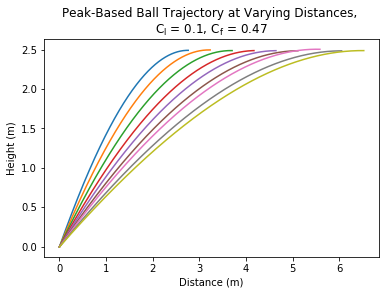

In [58]:
plt.title("Peak-Based Ball Trajectory at Varying Distances, \n$C_l$ = 0.1, $C_f$ = 0.47")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")

plt.rcParams.update({'mathtext.default':  'regular' })

trial_array = []
distance_array = []
omega_array = []
theta_array = []
velocity_array = []
spin_array = []
time_array = []
max_trials = 10

for i in range(0,max_trials):
    trial_array.append(i+1)
    distance = 2.3 + ((7-2.3) / max_trials)*i
    distance_array.append(distance)
    print("trial: " + str(i+1) + " , " + "distance: " + str(round(distance,3)))
    iterate()

plt.savefig("peak_based_" + str(max_trials) + "_trials.png")
plt.show()

In [35]:
print(len(trial_array))
print(len(distance_array))
print(len(omega_array))
print(len(theta_array))

30
30
30
30


In [25]:
trial_array.remove()
distance_array.remove()

## Test

In [36]:
def make_bold(val):
    bold = 'bold'
    
    return 'font-weight: %s' % bold

df = pd.DataFrame(data = {'Trial': trial_array, 
                          'Distance': distance_array, 
                          'Angular Velocity': omega_array, 
                          'Angle': theta_array,
                          'Velocity': velocity_array,
                          'Spin': spin_array,
                          'Time': time_array})
print(df)
df.to_csv("peak_based_" + str(max_trials) + "_trials.csv")

    Trial  Distance  Angular Velocity  Angle  Velocity   Spin   Time
0       1  2.300000           2301.38   61.0      8.27   7.11  0.707
1       2  2.456667           2320.48   60.0      8.34   7.17  0.722
2       3  2.613333           2368.23   58.0      8.51   7.31  0.710
3       4  2.770000           2387.32   57.0      8.58   7.37  0.724
4       5  2.926667           2425.52   56.0      8.72   7.49  0.736
5       6  3.083333           2473.27   54.0      8.89   7.64  0.720
6       7  3.240000           2501.92   53.0      8.99   7.73  0.732
7       8  3.396667           2559.21   51.0      9.20   7.90  0.719
8       9  3.553333           2587.86   50.0      9.30   7.99  0.726
9      10  3.710000           2626.06   49.0      9.44   8.11  0.734
10     11  3.866667           2664.25   48.0      9.58   8.23  0.741
11     12  4.023333           2702.45   47.0      9.72   8.34  0.748
12     13  4.180000           2778.85   45.0      9.99   8.58  0.729
13     14  4.336667           2817